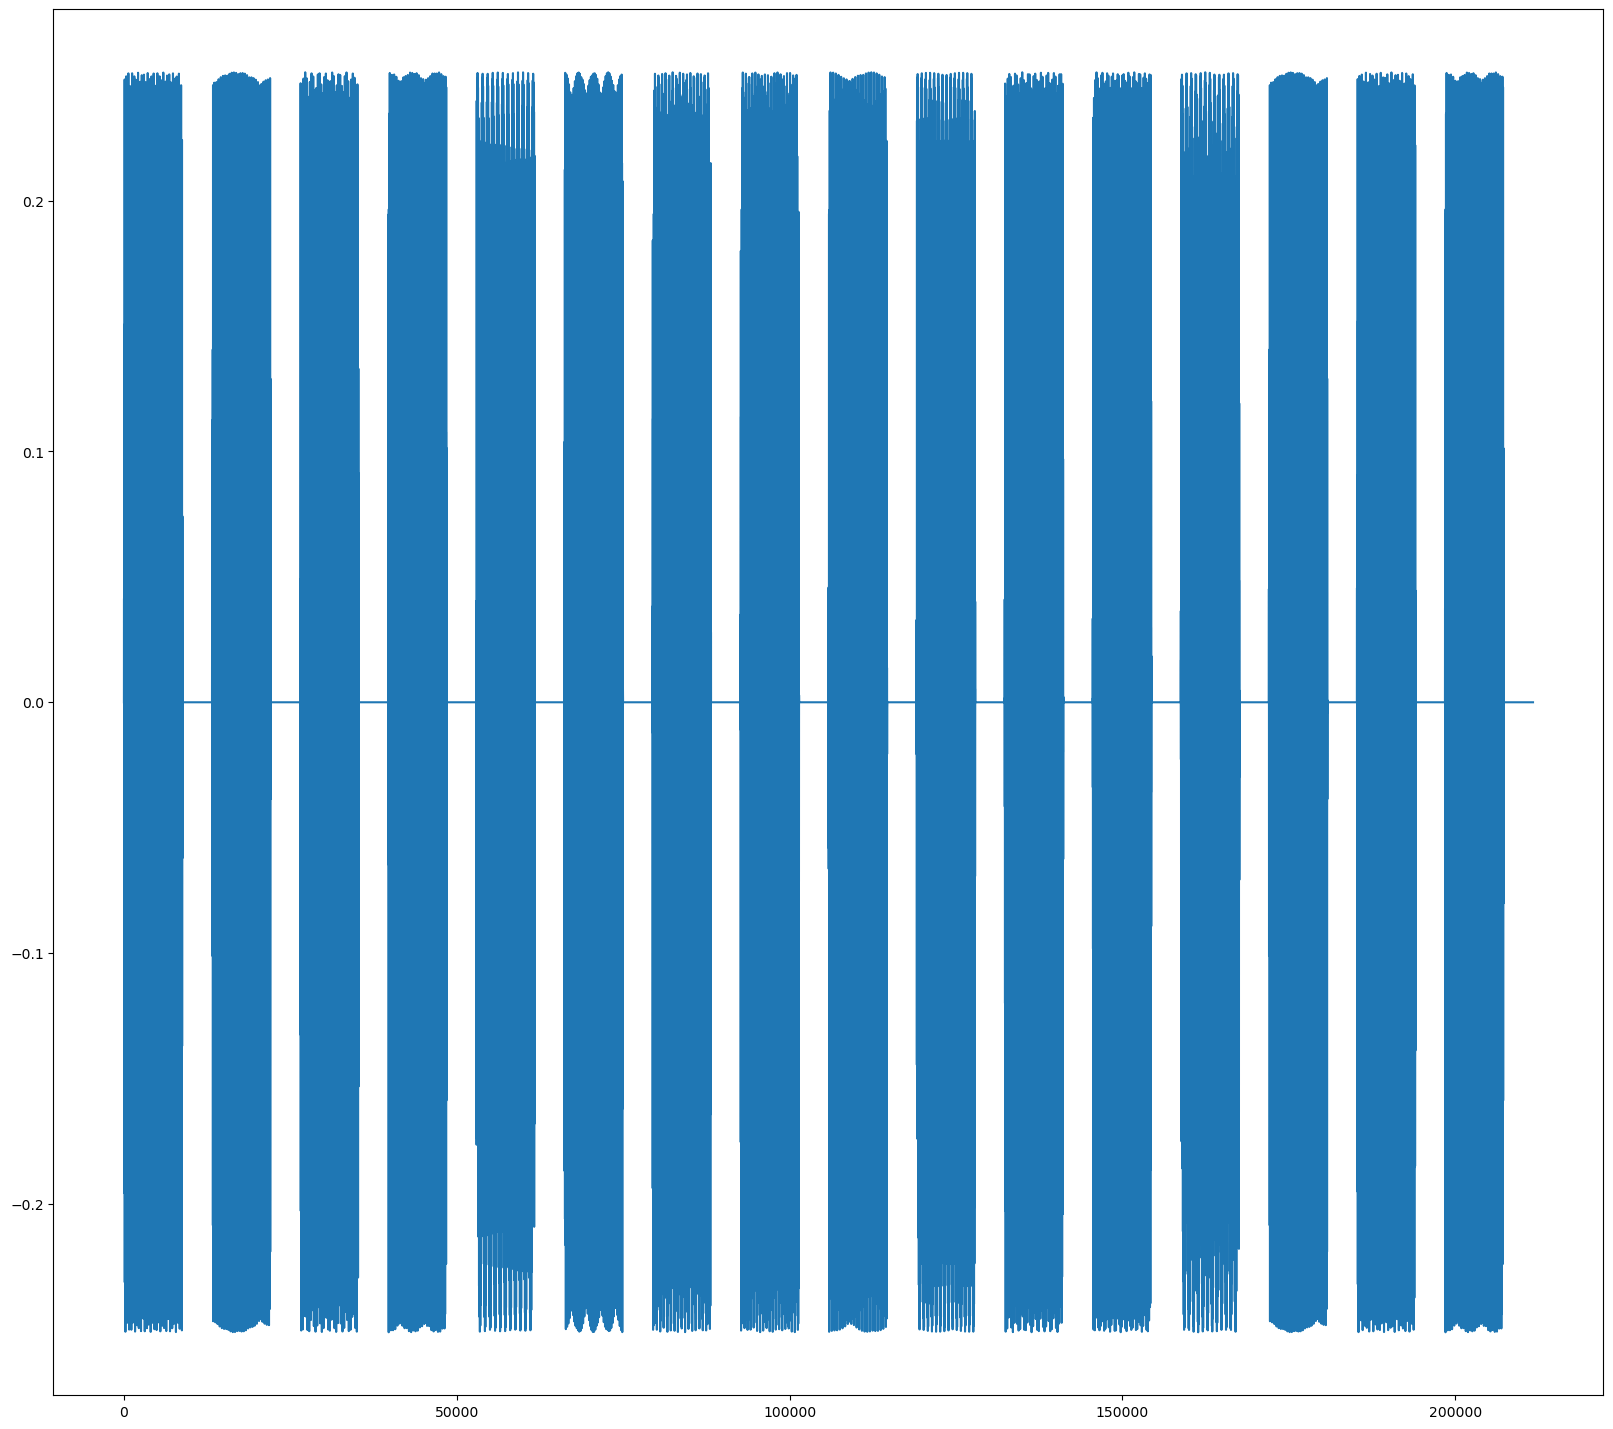

In [4]:
from scipy import signal
import math
import librosa
import numpy as np
import matplotlib.pyplot as plt

N = 44100
x, sr = librosa.load("DTMF_Lab4.wav", sr=N)
# длительность сигналов 200мс
length = int(N * 0.2)
# разделены сигналы паузами по 100мс
skip = int(length / 2)

fig, ax = plt.subplots(figsize=(20,18))
plt.plot(x)

In [10]:
def goertzel_algo(x, k, N):
    c = 2.0 * math.cos(2.0 * math.pi * k / N)
    g1 = 0
    g2 = 0
    for i in range(N):
        X = x[i] + c * g1 - g2
        g2, g1 = g1, X
    return g2**2 + g1**2 - c * g1 * g2

segments = [] 

#разделяем произведение на сегменты
len_and_skip = length + skip
for i in range(int(len(x) / len_and_skip)):
    segments.append(x[i * len_and_skip : i * len_and_skip + length])

freqs = [697, 770, 852, 941, 1209, 1336, 1477, 1633]
specs = [np.ceil(freq / N * length) for freq in freqs]

results = []
for i in range(len(segments)):
    res = []
    for j in range(len(freqs)):
        res.append(goertzel_algo(segments[i], specs[j], length))
    max1 = np.argmax(res)
    res[max1] = 0
    max2 = np.argmax(res)
    a = np.sort([freqs[max1], freqs[max2]])
    results.append(str(a[0]) + str(a[1]))

dictt = {str(697) + str(1209) : "1", str(697) + str(1336) : "2", str(697) + str(1477) : "3",
    str(697) + str(1633) : "A", str(770) + str(1209) : "4", str(770) + str(1336) : "5",
    str(770) + str(1477) : "6", str(770) + str(1633) : "B", str(852) + str(1209) : "7",
    str(852) + str(1336) : "8", str(852) + str(1477) : "9", str(852) + str(1633) : "C",
    str(941) + str(1209) : "*", str(941) + str(1336) : "0", str(941) + str(1477) : "#",
    str(941) + str(1633) : "D",
}

print("Decoded result:")
for item in results:
    print(dictt[item], end=" ")

Decoded result:
0 * 1 # 2 A 3 B 4 C 5 D 6 * 7 # 